<a href="https://colab.research.google.com/github/shirakawa24/aaaa/blob/main/RGB_threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

第一フレームを参照画像に

第一フレームを参照画像にセット&RGB+Grヒストグラム算出
参照画像変更152
参照画像変更294
capture error!!
ヒストグラム相関値をグラフ表示


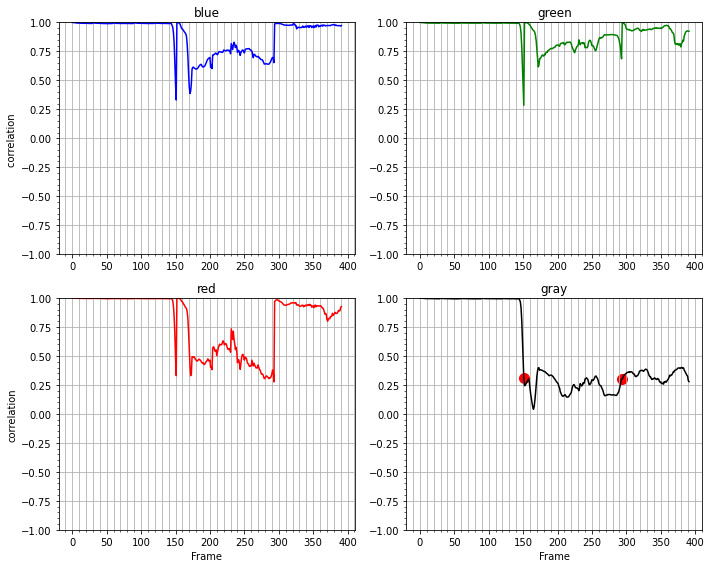

11.348083016999965


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import time
import copy
import os
import numpy as np
from matplotlib import pyplot as plt


# 開始
start_time = time.perf_counter()
# ダミー処理
time.sleep(1)

# カメラの場合path = 0 
video_path = ""
capture= cv2.VideoCapture(video_path)

count=0
colors = ("b","g","r")
switch = []
blue_result=[]
green_result=[]
red_result=[]
gray_result=[]
plot=[]
value=[]
img_dict={}

#グラフ設定

#figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
fig = plt.figure(figsize=(10,8))

#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

c1,c2,c3,c4 = "blue","green","red","black"      # 各プロットの色
l1,l2,l3,l4 = "blue","green","red","black"   # 各ラベル

while True:
  # カメラ/動画の画像を1フレーム分取得
  ret, img = capture.read()
  if not ret:
    print("capture error!!")
    break

  count +=1

  #動画の第1フレームを参照画像にする
  if count==1:
    reference=img
    for i,col in enumerate(colors):
      hist_one_frame = cv2.calcHist([reference],[i],None,[256],[0,256])
      if col == "b":
        hist_blue_ref = hist_one_frame
      elif col =="g":
        hist_green_ref = hist_one_frame
      elif col == "r":
        hist_red_ref = hist_one_frame
    gray_ref = cv2.cvtColor(reference, cv2.COLOR_BGR2GRAY)
    gray_ref_hist = cv2.calcHist([gray_ref],[0],None,[256],[0,256])

    print("第一フレームを参照画像にセット&RGB+Grヒストグラム算出")

  #1フレームごとに処理
  
  #plt.clf()

  #color
  for i, channel in enumerate(colors):
    hist_mobie2frame = cv2.calcHist([img],[i],None,[256],[0,256])

    if channel == "b":
      #残りフレームのヒストグラムより相関値を算出する
      hist_blue_movie=hist_mobie2frame
      corr=np.corrcoef(hist_blue_ref.flatten(),hist_blue_movie.flatten())[0,1]
      blue_result.append(corr)
      if corr<=0.3:
        blue_switch="ON"
        switch.append(blue_switch)
      #else:
        #red_switch="OFF"
        #switch.append(blue_switch)
      

    elif channel =="g":
      #残りフレームのヒストグラムより相関値を算出する
      hist_green_movie=hist_mobie2frame
      corr=np.corrcoef(hist_green_ref.flatten(),hist_green_movie.flatten())[0,1] 
      green_result.append(corr)
      if corr<=0.3:
        green_switch="ON"
        switch.append(green_switch)
      #else:
        #red_switch="OFF"
        #switch.append(green_switch)
      
      

    elif channel == "r":
      #残りフレームのヒストグラムより相関値を算出する
      hist_red_movie=hist_mobie2frame
      corr=np.corrcoef(hist_red_ref.flatten(),hist_red_movie.flatten())[0,1] 
      red_result.append(corr)
      if corr<=0.3:
        red_switch="ON"
        switch.append(red_switch)
      #else:
        #red_switch="OFF"
        #switch.append(red_switch)

      
#gray
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  hist_gray_movie = cv2.calcHist([gray],[0],None,[256],[0,256])

  #残りフレームのヒストグラムより相関値を算出する
  corr=np.corrcoef(gray_ref_hist.flatten(),hist_gray_movie.flatten())[0,1]
  gray_result.append(corr)


  #切り替え時の前画像フレーム表示のために、img一旦保持。ループで上書きされる
  #変化を見るため、切り替えフレーム含め、３フレーム前まで取得
  #pre_img_2：切り替え時より２前
  #pre_img_1:切り替え時より１前
  if count==1:
    pre_img_1 = img
  else:
    pre_img_2 = pre_img_1
    pre_img_1 = img

#検出されたら参照画像切り替えが行われる()
  if switch:
    reference = img

    #カラー化DeepLearningに知らせる
    print("参照画像変更"+str(count))

    #カラー化DeepLearningにreferenceを送信する

    
    #切り替え画像を辞書型に保存
    img_dict["切り替え前フレーム"+str(count-2)]=pre_img_2
    img_dict["切り替え前フレーム"+str(count-1)]=pre_img_1
    img_dict["切り替えフレーム"+str(count)]=img



    #切り替えタイミングをgrayにプロットする。grayの値を保持
    plot.append(copy.copy(count))
    value.append(copy.copy(corr))

    #参照画像が切り替わる
    hist_blue_ref=hist_blue_movie
    hist_green_ref=hist_green_movie
    hist_red_ref=hist_red_movie
    gray_hist_movie=hist_gray_movie


  #switchリストを空に
  switch.clear()    



  

#==========ここまでループ内==============#

print("ヒストグラム相関値をグラフ表示")

#グラフ設定
ax1.plot(blue_result, color=c1, label=l1)
ax1.set_title("blue")
ax1.set_ylim(-1,1)
ax1.set_ylabel("correlation ")
ax1.minorticks_on()
ax1.grid(which = "both", axis="x")
ax1.grid(axis="y")

ax2.plot(green_result, color=c2, label=l2)
ax2.set_title("green")
ax2.set_ylim(-1,1)
ax2.minorticks_on()
ax2.grid(which = "both", axis="x")
ax2.grid(axis="y")

ax3.plot(red_result,color=c3, label=l3)
ax3.set_title("red")
ax3.set_ylim(-1,1)
ax3.set_xlabel("Frame")
ax3.set_ylabel("correlation")
ax3.minorticks_on()
ax3.grid(which = "both", axis="x")
ax3.grid(axis="y")

ax4.plot(gray_result, color=c4, label=l4)
ax4.set_title("gray")
ax4.set_ylim(-1,1)
ax4.set_xlabel("Frame")
ax4.minorticks_on()
ax4.grid(which = "both", axis="x")
ax4.grid(axis="y")
if plot :
  ax4.scatter(plot, value,s=100,c="r")




#図が重ならないようにする
fig.tight_layout()            
plt.show()

#終了
end_time = time.perf_counter()
# 経過時間を出力(秒)
elapsed_time = end_time - start_time
print(elapsed_time)

#print(hist.shape)
#print(hist_frame.shape)
#print("result"+str(result))
#print("最小値  :  "+str(min(result)),"最大値  :  "+str(max(result)))

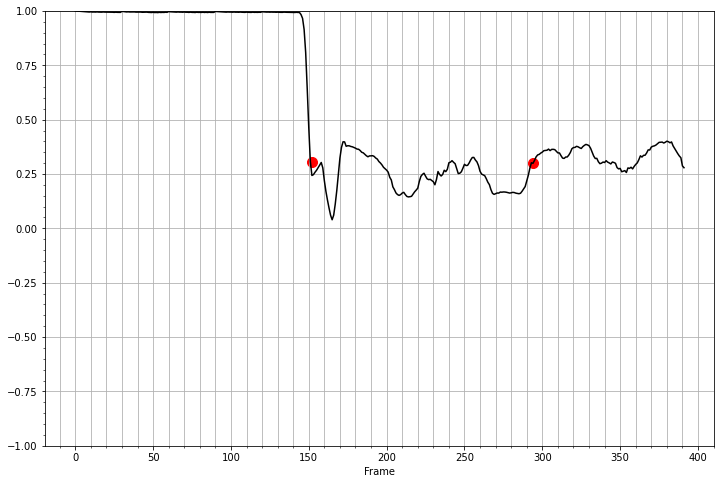

In [ ]:
#gray グラフ拡大
plt.figure(figsize=(12,8))
plt.plot(gray_result, color=c4, label=l4)
plt.ylim(-1,1)
plt.xlabel("Frame")
plt.minorticks_on()
plt.grid(which = "both", axis="x")
plt.grid(axis="y")
if plot :
  plt.scatter(plot, value,s=100,c="r")
plt.show()


## 切り替え画像確認

2フレーム前から確認,一番右が切り替え時フレーム

In [ ]:
def hconcat_resize_min(im_list, interpolation=cv2.INTER_CUBIC):
    h_min = min(im.shape[0] for im in im_list)
    im_list_resize = [cv2.resize(im, (int(im.shape[1] * h_min / im.shape[0]), h_min), interpolation=interpolation)
                      for im in im_list]
    return cv2.hconcat(im_list_resize)

img_count=0

for frame_count,switch_frame in img_dict.items():
  img_count+=1
  print(frame_count)
  if img_count%3 ==1:
    im1=switch_frame
  elif img_count%3 == 2:
    im2=switch_frame
  elif img_count%3 == 0:
    im3=switch_frame
    name = frame_count
    im_h_resize = hconcat_resize_min([im1, im2, im3])
    cv2.imwrite(f'{name}.jpg', im_h_resize)
    print(f"{frame_count}(右)を含めた、前３フレーム取得")

切り替え前フレーム150
切り替え前フレーム151
切り替えフレーム152
切り替えフレーム152(右)を含めた、前３フレーム取得
切り替え前フレーム292
切り替え前フレーム293
切り替えフレーム294
切り替えフレーム294(右)を含めた、前３フレーム取得


メモ:
ミケレット先生より、referenceは少し前のを抽出する方法も良いのではないか?(ex:50フレーム前)

 RGB相関値切り替え手法なし

第一フレームを参照画像にセット&RGB+Grヒストグラム算出
capture error!!
ヒストグラム相関値をグラフ表示


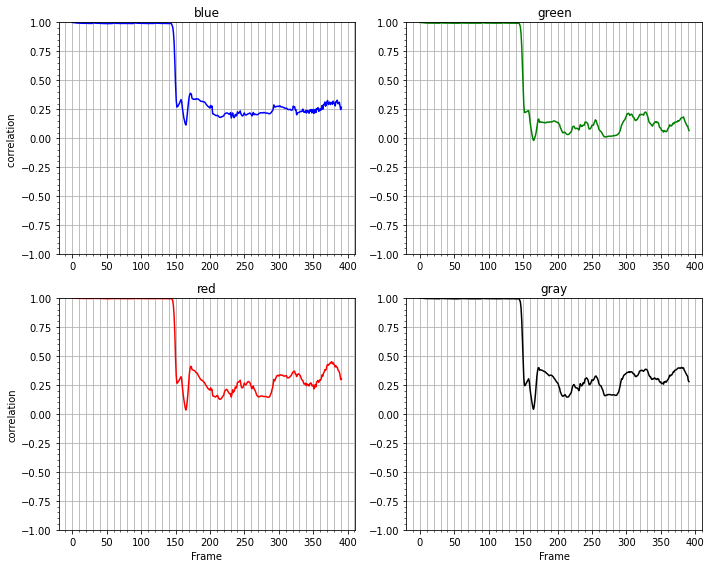

12.380797864999977


In [ ]:
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt

# 開始
start_time = time.perf_counter()
# ダミー処理
time.sleep(1)

# カメラの場合path = 0 
video_path = "/content/drive/MyDrive/Deep_learning/Dataset/imovie_processing/Cube.mp4"
capture= cv2.VideoCapture(video_path)

count=0
colors = ("b","g","r")
blue_result=[]
green_result=[]
red_result=[]
gray_result=[]

#グラフ設定

#figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
fig = plt.figure(figsize=(10,8))

#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

c1,c2,c3,c4 = "blue","green","red","black"      # 各プロットの色
l1,l2,l3,l4 = "blue","green","red","black"   # 各ラベル

while True:
  # カメラ/動画の画像を1フレーム分取得
  ret, img = capture.read()
  if not ret:
    print("capture error!!")
    break

  count +=1

  #動画の第1フレームを参照画像にする
  if count==1:
    reference=img
    for i,col in enumerate(colors):
      hist_one_frame = cv2.calcHist([reference],[i],None,[256],[0,256])
      if col == "b":
        hist_blue_ref = hist_one_frame
      elif col =="g":
        hist_green_ref = hist_one_frame
      elif col == "r":
        hist_red_ref = hist_one_frame
    gray_ref = cv2.cvtColor(reference, cv2.COLOR_BGR2GRAY)
    gray_ref_hist = cv2.calcHist([gray_ref],[0],None,[256],[0,256])

    print("第一フレームを参照画像にセット&RGB+Grヒストグラム算出")

  #1フレームごとに処理
  
  #plt.clf()

  #color
  for i, channel in enumerate(colors):
    hist_mobie2frame = cv2.calcHist([img],[i],None,[256],[0,256])

    if channel == "b":
      #残りフレームのヒストグラムより相関値を算出する
      hist_blue_movie=hist_mobie2frame

      corr=np.corrcoef(hist_blue_ref.flatten(),hist_blue_movie.flatten())[0,1] 
      blue_result.append(corr)
      

    elif channel =="g":
      #残りフレームのヒストグラムより相関値を算出する
      hist_green_movie=hist_mobie2frame

      corr=np.corrcoef(hist_green_ref.flatten(),hist_green_movie.flatten())[0,1] 
      green_result.append(corr)
      
      

    elif channel == "r":
      #残りフレームのヒストグラムより相関値を算出する
      hist_red_movie=hist_mobie2frame

      corr=np.corrcoef(hist_red_ref.flatten(),hist_red_movie.flatten())[0,1] 
      red_result.append(corr)
      
#gray
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  hist_gray_movie = cv2.calcHist([gray],[0],None,[256],[0,256])

  #残りフレームのヒストグラムより相関値を算出する
  corr=np.corrcoef(gray_ref_hist.flatten(),hist_gray_movie.flatten())[0,1]
  gray_result.append(corr)

#検出されたら参照画像切り替えが行われる()

  #if :
    #reference = img

    #カラー化DeepLearningに知らせる

    #参照画像が切り替わる
    #hist_blue_ref=hist_blue_movie
    #hist_green_ref=hist_green_movie
    #hist_red_ref=hist_red_movie

  

#==========ここまでループ内==============#

print("ヒストグラム相関値をグラフ表示")

#グラフ設定
ax1.plot(blue_result, color=c1, label=l1)
ax1.set_title("blue")
ax1.set_ylim(-1,1)
ax1.set_ylabel("correlation ")
ax1.minorticks_on()
ax1.grid(which = "both", axis="x")
ax1.grid(axis="y")

ax2.plot(green_result, color=c2, label=l2)
ax2.set_title("green")
ax2.set_ylim(-1,1)
ax2.minorticks_on()
ax2.grid(which = "both", axis="x")
ax2.grid(axis="y")

ax3.plot(red_result,color=c3, label=l3)
ax3.set_title("red")
ax3.set_ylim(-1,1)
ax3.set_xlabel("Frame")
ax3.set_ylabel("correlation")
ax3.minorticks_on()
ax3.grid(which = "both", axis="x")
ax3.grid(axis="y")

ax4.plot(gray_result, color=c4, label=l4)
ax4.set_title("gray")
ax4.set_ylim(-1,1)
ax4.set_xlabel("Frame")
ax4.minorticks_on()
ax4.grid(which = "both", axis="x")
ax4.grid(axis="y")


#図が重ならないようにする
fig.tight_layout()            
plt.show()

#終了
end_time = time.perf_counter()
# 経過時間を出力(秒)
elapsed_time = end_time - start_time
print(elapsed_time)

#print(hist.shape)
#print(hist_frame.shape)
#print("result"+str(result))
#print("最小値  :  "+str(min(result)),"最大値  :  "+str(max(result)))